# Step 1: Data Aquisition

In [1]:
import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Print the shapes of the loaded data to verify
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


# Step 2: Exploratory Data Analysis (EDA)

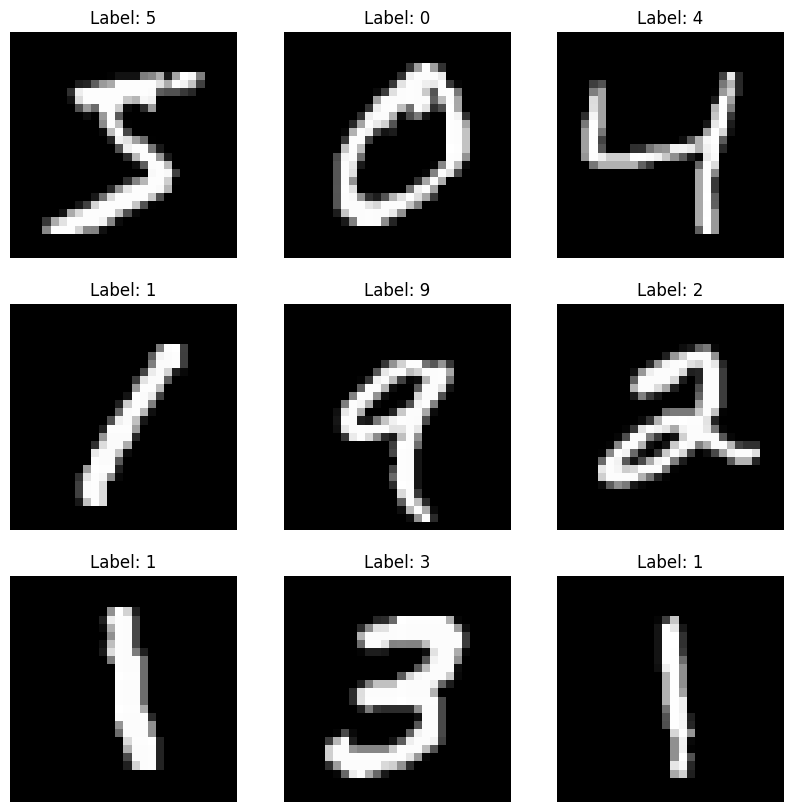

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Display the first 9 images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# Step 3. Data Preprocessing

In [3]:
# Scale the images to the [0, 1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print("x_train shape after scaling:", x_train.shape)
print("x_test shape after scaling:", x_test.shape)

x_train shape after scaling: (60000, 28, 28)
x_test shape after scaling: (10000, 28, 28)


# Step 4. Modelling

In [4]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

# Define the model
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images
    Dense(128, activation='relu'),  # First hidden layer with ReLU activation
    Dense(64, activation='relu'),   # Second hidden layer with ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 units for the 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8588 - loss: 0.4785 - val_accuracy: 0.9566 - val_loss: 0.1428
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9640 - loss: 0.1196 - val_accuracy: 0.9682 - val_loss: 0.1049
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9768 - loss: 0.0747 - val_accuracy: 0.9684 - val_loss: 0.1064
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9829 - loss: 0.0538 - val_accuracy: 0.9713 - val_loss: 0.1031
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9867 - loss: 0.0416 - val_accuracy: 0.9712 - val_loss: 0.0996
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9894 - loss: 0.0331 - val_accuracy: 0.9743 - val_loss: 0.0990
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9920 - loss: 0.0257 - val_accuracy: 0.9717 - val_loss: 0.1067
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9919 - loss: 0.0239 - 

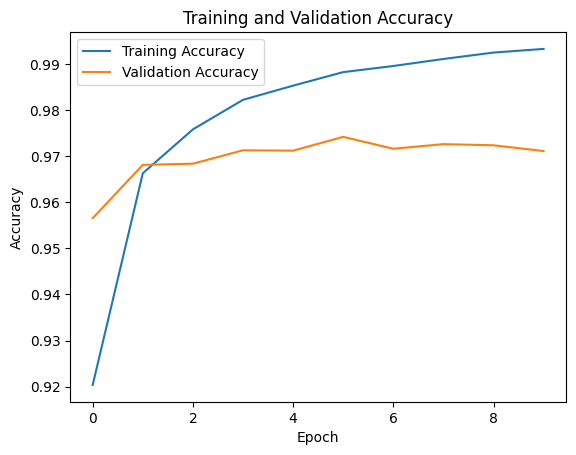

In [6]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

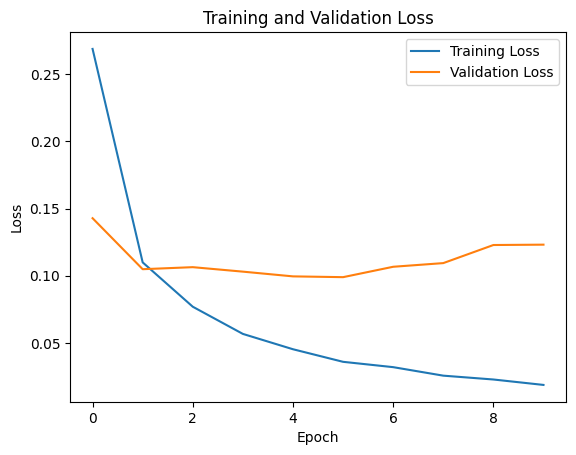

In [7]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 5. Perform Predictions

In [8]:
# Generate predictions
predictions = model.predict(x_test)

# Print the shape of the predictions
print("Predictions shape:", predictions.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predictions shape: (10000, 10)


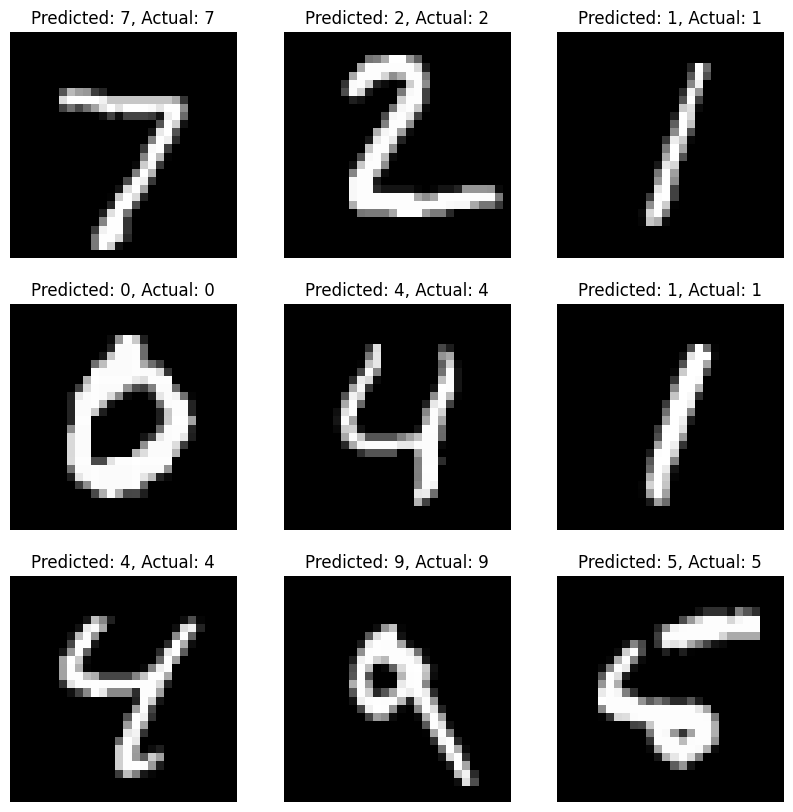

In [9]:
import numpy as np

# Display some test images and their predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    predicted_label = np.argmax(predictions[i])
    plt.title(f"Predicted: {predicted_label}, Actual: {y_test[i]}")
    plt.axis('off')
plt.show()

# Step 6. Model Evaluation

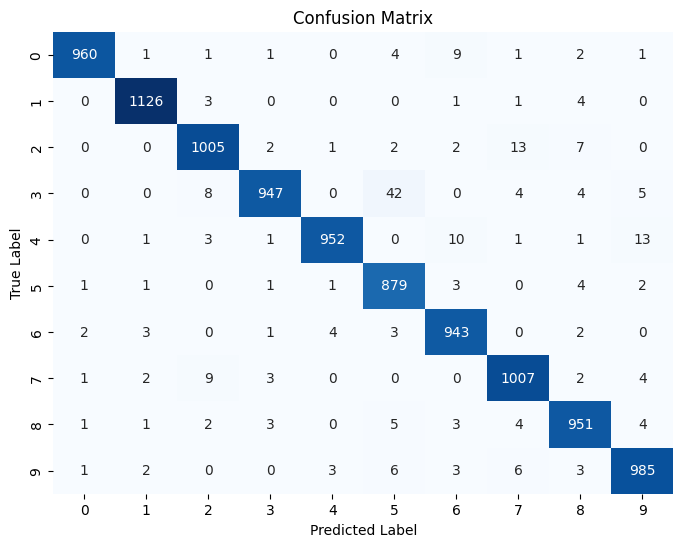

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted classes from the predictions
predicted_classes = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [13]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, predicted_classes)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.99      0.94      0.96      1010
           4       0.99      0.97      0.98       982
           5       0.93      0.99      0.96       892
           6       0.97      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Convert true labels to one-hot encoding for ROC AUC calculation
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# Calculate ROC AUC for each class
roc_auc_scores = roc_auc_score(y_test_bin, predictions, average=None)

# Print the ROC AUC scores for each class
for i, score in enumerate(roc_auc_scores):
    print(f"ROC AUC for class {i}: {score:.4f}")

# Calculate macro-average ROC AUC
macro_roc_auc = roc_auc_score(y_test_bin, predictions, average='macro')
print(f"\nMacro-average ROC AUC: {macro_roc_auc:.4f}")

ROC AUC for class 0: 0.9998
ROC AUC for class 1: 0.9999
ROC AUC for class 2: 0.9996
ROC AUC for class 3: 0.9992
ROC AUC for class 4: 0.9993
ROC AUC for class 5: 0.9995
ROC AUC for class 6: 0.9995
ROC AUC for class 7: 0.9993
ROC AUC for class 8: 0.9993
ROC AUC for class 9: 0.9989

Macro-average ROC AUC: 0.9994


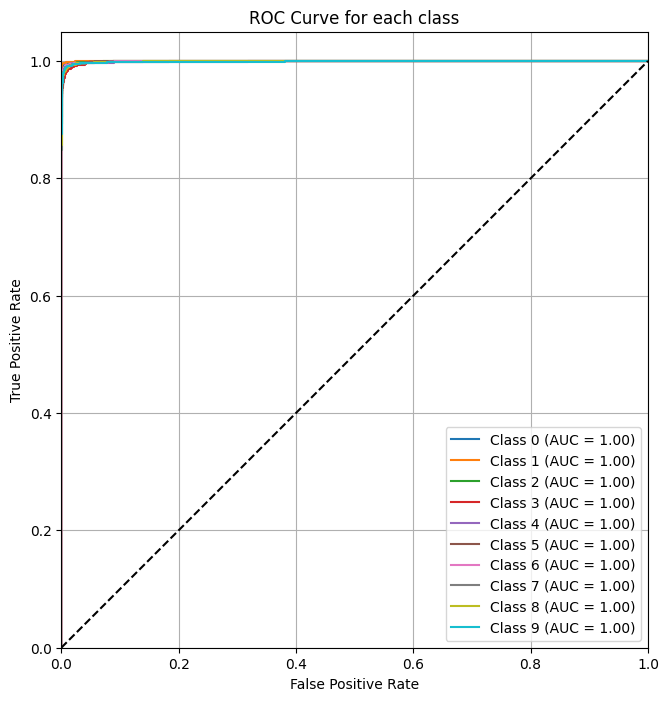

In [16]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Convert true labels to one-hot encoding for ROC AUC calculation
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# Calculate ROC curve and ROC AUC for each class
plt.figure(figsize=(10, 8))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=f'Class {i}')
    display.plot(ax=plt.gca())

plt.title('ROC Curve for each class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], 'k--') # Add diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

The ROC AUC curve for each class shows the trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR) at various threshold settings.

- **True Positive Rate (TPR)**: Also known as Sensitivity or Recall, it's the proportion of actual positive cases that are correctly identified.
- **False Positive Rate (FPR)**: This is the proportion of actual negative cases that are incorrectly identified as positive.

An ideal model would have a ROC curve that goes straight up from the bottom left corner to the top left corner and then across to the top right corner. The closer the curve is to the top-left corner, the better the model's performance.

The Area Under the Curve (AUC) provides a single scalar value that summarizes the overall performance of the classifier. An AUC of 1.0 represents a perfect classifier, while an AUC of 0.5 represents a classifier that performs no better than random chance (represented by the diagonal dashed line).

In the generated plot, each colored line represents the ROC curve for a specific digit class (0 through 9). The AUC value for each class is also shown in the legend. Since all the curves are very close to the top-left corner and have AUC values close to 1.0, this indicates that the model is performing very well in distinguishing between each digit class.

# Step 7. Deployment

# Step 8. Monitoring